<a href="https://colab.research.google.com/github/Yusra-Zafar/Deep-Learning/blob/main/ANN/student_admission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student admission prediction using ANN (regression problem)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
url = "https://raw.githubusercontent.com/Yusra-Zafar/Deep-Learning/main/ANN/gre_adm_pred.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**ABOUT DATA**
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose, SOP ( out of 5 )
5. Letter of Recommendation Strength, LOR (out of 5)
6. Undergraduate GPA ( out of 10 )
7. Research Experience ( either 0 or 1 )
8. Chance of Admit ( ranging from 0 to 1 )

## exploring and preprocessing

In [4]:
df.drop(columns='Serial No.', inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# prompt: replace "Chance of Admit " with "Chance of Admit"

df.rename(columns={"Chance of Admit ": "Chance of Admit"}, inplace=True)

In [11]:
X = df.drop(columns='Chance of Admit', axis=1)
y = df['Chance of Admit']

In [12]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [13]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [15]:
# using minmax scaler because min and max values are known
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

## getting ANN ready

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# ANN architecture
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 5)                 40        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 102 (408.00 Byte)
Trainable params: 102 (408.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### training

In [43]:
# ANN training
history = model.fit(X_train, y_train, epochs=40, verbose=True, validation_split=0.2)

Epoch 1/40
10/10 [==============================] - 1s 23ms/step - loss: 0.4080 - val_loss: 0.4232
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 0.3662 - val_loss: 0.3763
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 0.3193 - val_loss: 0.3233
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 0.2680 - val_loss: 0.2642
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.2104 - val_loss: 0.1984
Epoch 6/40
10/10 [==============================] - 0s 6ms/step - loss: 0.1489 - val_loss: 0.1338
Epoch 7/40
10/10 [==============================] - 0s 7ms/step - loss: 0.0948 - val_loss: 0.0821
Epoch 8/40
10/10 [==============================] - 0s 7ms/step - loss: 0.0564 - val_loss: 0.0500
Epoch 9/40
10/10 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.0356
Epoch 10/40
10/10 [==============================] - 0s 8ms/step - loss: 0.0277 - val_loss: 0.0295
Epoch 11/40
10/10 

### testing

In [44]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


## Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")

Mean Absolute Error: 0.05339351534843445
Mean Squared Error: 0.0053183046623930955
R2 score: 0.7245971382945939


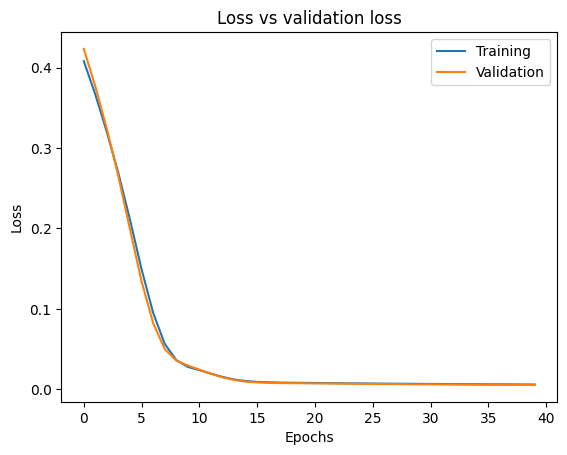

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()